In [1]:
import sql_functions as sf
import sqlalchemy
import pandas as pd
import json
import psycopg2

In [2]:
schema = 'hh_analytics_23_4'
flights_eda=sf.get_dataframe(f'select * from {schema}.flights_mw_group04;')

In [19]:
flights_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62568 entries, 0 to 62567
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   flight_date          62568 non-null  datetime64[ns]
 1   dep_time             62067 non-null  float64       
 2   sched_dep_time       62568 non-null  int64         
 3   dep_delay            62067 non-null  float64       
 4   arr_time             62056 non-null  float64       
 5   sched_arr_time       62568 non-null  int64         
 6   arr_delay            61941 non-null  float64       
 7   airline              62568 non-null  object        
 8   tail_number          62455 non-null  object        
 9   flight_number        62568 non-null  int64         
 10  origin               62568 non-null  object        
 11  dest                 62568 non-null  object        
 12  air_time             61941 non-null  float64       
 13  actual_elapsed_time  61941 non-

In [13]:
flights_eda['flight_date'] = pd.to_datetime(flights_eda['flight_date'])
subset_august_10_11 = flights_eda[(flights_eda['flight_date'] >= '2020-08-10') & (flights_eda['flight_date'] <= '2020-08-11')]

In [14]:
subset_august_10_11

,flight_date,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,airline,tail_number,flight_number,...,actual_elapsed_time,distance,cancelled,diverted,carrier_delay,weather_delay,nas_delay,security_delay,lateaircraft_delay,hour
9,2020-08-10,1451.0,1424,27.0,1538.0,1510,28.0,9E,N315PQ,4629,...,107.0,534.0,0,0,0.0,0.0,28.0,0.0,0.0,0
10,2020-08-11,1421.0,1424,-3.0,1459.0,1510,-11.0,9E,N335PQ,4629,...,98.0,534.0,0,0,NaN,NaN,NaN,NaN,NaN,0
40,2020-08-10,1420.0,1305,75.0,1517.0,1417,60.0,9E,N292PQ,4647,...,57.0,232.0,0,0,46.0,0.0,0.0,0.0,14.0,0
41,2020-08-11,1259.0,1305,-6.0,1355.0,1417,-22.0,9E,N311PQ,4647,...,56.0,232.0,0,0,NaN,NaN,NaN,NaN,NaN,0
71,2020-08-10,1133.0,1105,28.0,1247.0,1214,33.0,9E,N292PQ,4647,...,74.0,232.0,0,0,0.0,28.0,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62511,2020-08-10,2008.0,2010,-2.0,2155.0,2151,4.0,YX,N131HQ,4687,...,107.0,427.0,0,0,NaN,NaN,NaN,NaN,NaN,0
62512,2020-08-11,1617.0,1624,-7.0,1757.0,1808,-11.0,YX,N446YX,4687,...,100.0,427.0,0,0,NaN,NaN,NaN,NaN,NaN,0
62538,2020-08-10,1448.0,1455,-7.0,1652.0,1705,-13.0,YX,N401YX,4700,...,64.0,286.0,0,0,NaN,NaN,NaN,NaN,NaN,0
62560,2020-08-10,1834.0,1836,-2.0,2109.0,2040,29.0,YX,N405YX,4710,...,215.0,972.0,0,0,0.0,0.0,29.0,0.0,0.0,0


# showing value counts for each col

In [15]:
flights_eda.count()

flight_date            62568
dep_time               62067
sched_dep_time         62568
dep_delay              62067
arr_time               62056
sched_arr_time         62568
arr_delay              61941
airline                62568
tail_number            62455
flight_number          62568
origin                 62568
dest                   62568
air_time               61941
actual_elapsed_time    61941
distance               62568
cancelled              62568
diverted               62568
carrier_delay           3833
weather_delay           3833
nas_delay               3833
security_delay          3833
lateaircraft_delay      3833
hour                   62568
dtype: int64

# sort the data based on number of cancelled flights:

In [18]:
# sort the data based on number of cancelled flights:
sorted_data = flights_eda.sort_values(by='cancelled', ascending=False)

cancelled_counts = sorted_data.groupby('flight_date')['cancelled'].sum().reset_index(name='num_cancelled_flights')

result = pd.merge(sorted_data, cancelled_counts, on='flight_date')

print(result[['flight_date', 'cancelled', 'num_cancelled_flights']].tail(40))

      flight_date  cancelled  num_cancelled_flights
62528  2020-08-08          0                      0
62529  2020-08-08          0                      0
62530  2020-08-08          0                      0
62531  2020-08-08          0                      0
62532  2020-08-08          0                      0
62533  2020-08-08          0                      0
62534  2020-08-08          0                      0
62535  2020-08-08          0                      0
62536  2020-08-08          0                      0
62537  2020-08-08          0                      0
62538  2020-08-08          0                      0
62539  2020-08-08          0                      0
62540  2020-08-08          0                      0
62541  2020-08-08          0                      0
62542  2020-08-08          0                      0
62543  2020-08-08          0                      0
62544  2020-08-08          0                      0
62545  2020-08-08          0                      0
62546  2020-

In [ ]:
flights_eda

In [46]:
import matplotlib.pyplot as plt

# using barchart to see the dates along with number oc cancelled flights

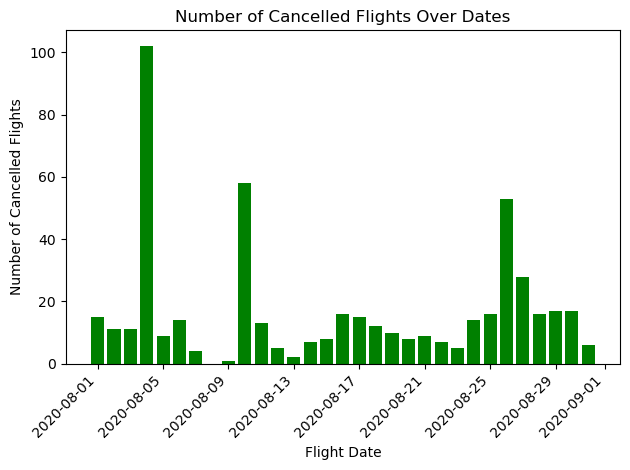

In [41]:
# using barchart to see the dates along with number oc cancelled flights
flights_eda['flight_date'] = pd.to_datetime(flights_eda['flight_date'])

# Group by flight_date and calculate the total number of cancelled flights for each date
cancelled_counts = flights_eda.groupby('flight_date')['cancelled'].sum().reset_index(name='num_cancelled_flights')

# Plotting
plt.bar(cancelled_counts['flight_date'], cancelled_counts['num_cancelled_flights'], color='green')
plt.title('Number of Cancelled Flights Over Dates')
plt.xlabel('Flight Date')
plt.ylabel('Number of Cancelled Flights')
plt.xticks(rotation=45, ha='right')  #rotate the strings
plt.tight_layout()

plt.show()

In [48]:
flights_eda.airline.nunique()

16

# finding the number of cancelled flights per airline in the whole month

In [30]:
# Group by airline and calculate the total number of cancelled flights for each airline
cancelled_counts_by_airline = flights_eda.groupby('airline')['cancelled'].sum().reset_index(name='num_cancelled_flights')

# Sort the data based on the number of cancelled flights in descending order
sorted_data_by_airline = cancelled_counts_by_airline.sort_values(by='num_cancelled_flights', ascending=False)

# Display the resulting DataFrame
print(sorted_data_by_airline)

   airline  num_cancelled_flights
13      WN                    164
15      YX                     98
12      UA                     77
11      OO                     64
14      YV                     28
1       AA                     24
7       G4                     18
0       9E                     16
4       DL                      6
3       B6                      5
6       F9                      5
10      OH                      2
8       MQ                      1
9       NK                      1
2       AS                      0
5       EV                      0


# plotting average weather delay for each day

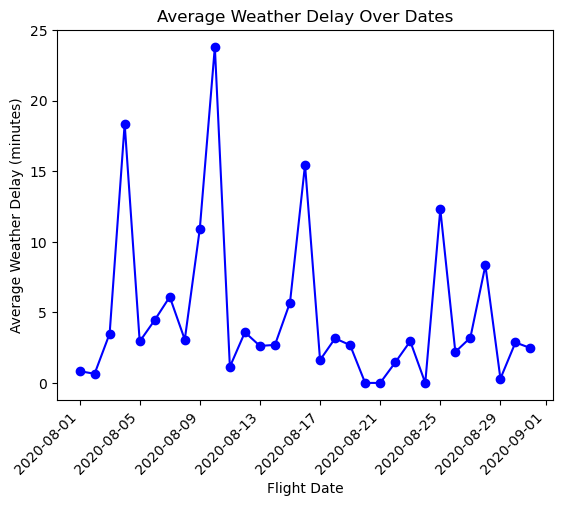

In [42]:
# plotting average weather delay for each day
average_weather_delay = flights_eda.groupby('flight_date')['weather_delay'].mean().reset_index(name='avg_weather_delay')

# Plotting

plt.plot(average_weather_delay['flight_date'], average_weather_delay['avg_weather_delay'], marker='o', linestyle='-', color='blue')
plt.title('Average Weather Delay Over Dates')
plt.xlabel('Flight Date')
plt.ylabel('Average Weather Delay (minutes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


# Display the plot
plt.show()

# nunmber of diverted flights on each day:

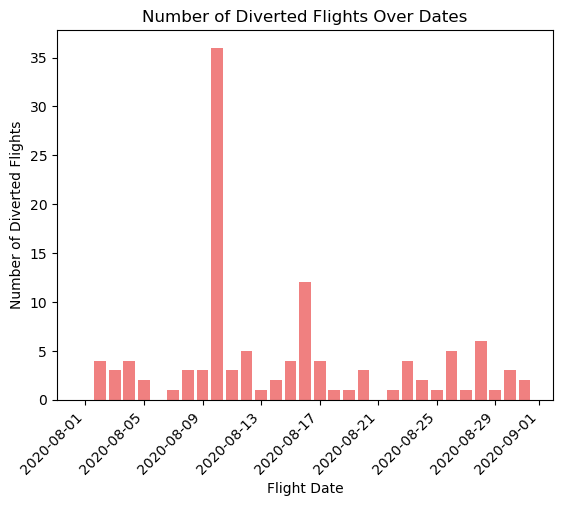

In [45]:
# nunmber of diverted flights on each day:

# Group by flight_date and calculate the total number of diverted flights for each date
diverted_counts = flights_eda.groupby('flight_date')['diverted'].sum().reset_index(name='num_diverted_flights')

# Plotting

plt.bar(diverted_counts['flight_date'], diverted_counts['num_diverted_flights'], color='lightcoral')
plt.title('Number of Diverted Flights Over Dates')
plt.xlabel('Flight Date')
plt.ylabel('Number of Diverted Flights')
plt.xticks(rotation=45, ha='right')  

plt.show()

In [55]:
# number of cancelled flights based on the destination
cancelled_counts_by_destination = flights_eda.groupby('dest')['cancelled'].sum().reset_index(name='num_cancelled_flights')
cancelled_counts_by_destination.sort_values("num_cancelled_flights", ascending=False)

,dest,num_cancelled_flights
104,ORD,126
85,MDW,60
144,STL,39
76,LGA,28
66,IAH,22
...,...,...
33,COU,0
88,MIA,0
87,MHT,0
84,MDT,0


In [56]:
# number of cancelled flights based on the origin
cancelled_counts_by_origin = flights_eda.groupby('origin')['cancelled'].sum().reset_index(name='num_cancelled_flights')
cancelled_counts_by_origin.sort_values("num_cancelled_flights", ascending=False)

,origin,num_cancelled_flights
104,ORD,124
85,MDW,59
144,STL,38
76,LGA,27
66,IAH,21
...,...,...
92,MQT,0
90,MKG,0
36,CWA,0
88,MIA,0
